# Generating catalogs with SkyCatalog

This is a demonstration of using the `SkyCatalog` class to generate catalogs of sky positions over parts of the sky

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits as fits

import pkg_resources
pkg_resources.require("numpy==1.26.3")
import numpy as np

from dl import queryClient as qc
import pandas as pd

In [2]:
# the jupyter kernel needs to be reset if changes are made to the class
%load_ext autoreload
%reload_ext autoreload
from catalog_class import SkyCatalogue

Initialize with minimum object masking radius (default = 20 arcsec), spacing between dark sky positions (default = 45 arsec), dimension of segmentation map analysis (default = 1 degree), and DR10 wavebands to use in addition to g (g, r, i, z)

In [ ]:
# TODO: make it so you can select which bands to use?

catalog = SkyCatalogue()
# catalog_g_band = SkyCatalogue(bands=('g'))

Loading masked star data....
Defining grid lines...
Creating KDTree for distance calculations...
KDTree created!


Sky positions can be generated on multiple different levels:
- Single degree (1 x 1) squares using an externally provided dataframe of star ra/dec and mask radius to work from
- Single query (n x n degree) square split up into single-degree chunks
- "Full sky" split up into (n x n degree) square queries, with each of those also split into single-degree chunks

>>>> Combining mask and queried stars...
>>>> Calculating pixel values for stars....
>>>> Creating segmentation map...
Done!
>>>> Finding dark regions in segmentation map...
>>>> Plotting dark regions...


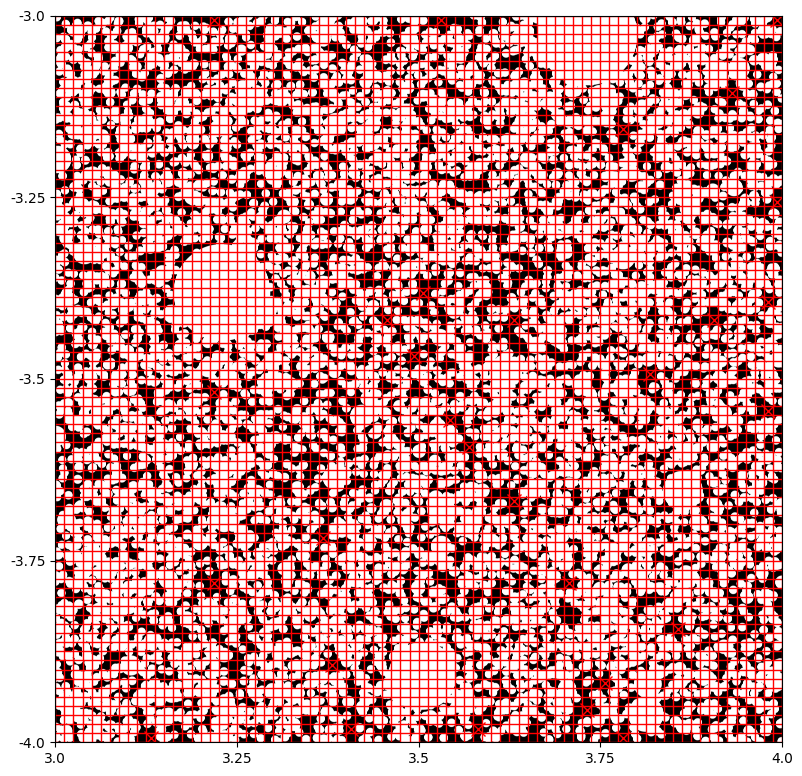

>>>> Converting dark regions to coordinates...
>>>> Finding maximum extent of stars beyond the degree-square bounds...
>>>> Done!
Positions found: 58


In [4]:
# single degree
# query LSDR10 catalog from NOIRLab Astro Data Lab
query_df = catalog.query_tractor(3, -4)
single_degree_catalog, overlap = catalog.create_degree_square(3, -4, query_df, plot_image=True)
print(f"Positions found: {single_degree_catalog.size}")

>>>> Combining mask and queried stars...
>>>> Calculating pixel values for stars....
>>>> Creating segmentation map...
Done!
>>>> Finding dark regions in segmentation map...
>>>> Plotting dark regions...


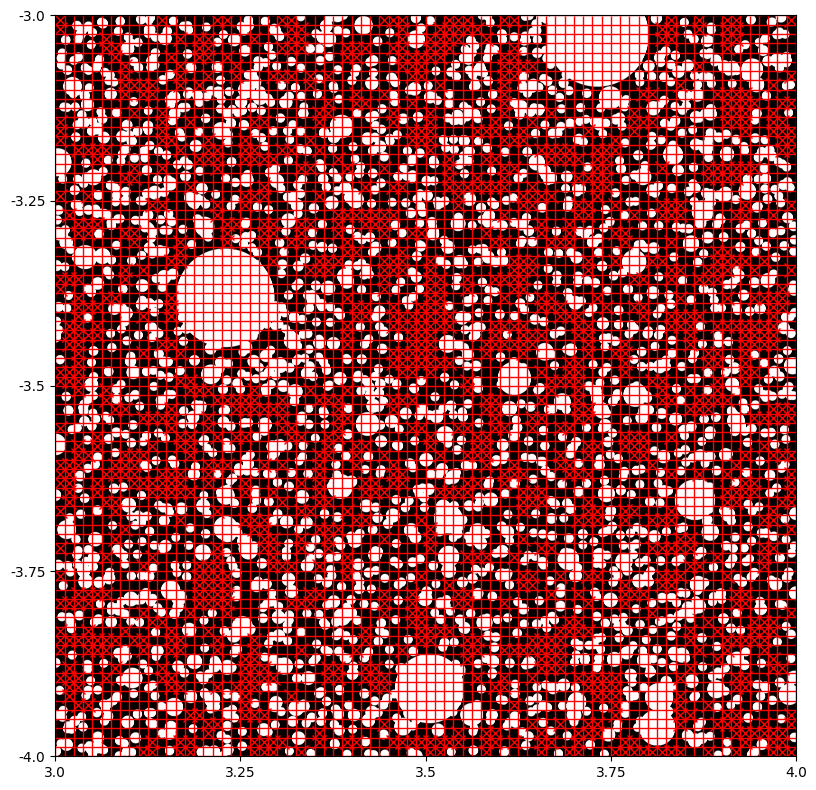

>>>> Converting dark regions to coordinates...
>>>> Finding maximum extent of stars beyond the degree-square bounds...
>>>> Done!
Positions found: 2608


In [5]:
# single degree
# query LSDR10 catalog from NOIRLab Astro Data Lab
catalog.bands = ('g')
query_df = catalog.query_tractor(3, -4)
single_degree_catalog, overlap = catalog.create_degree_square(3, -4, query_df, plot_image=True)
print(f"Positions found: {single_degree_catalog.size}")

In [6]:
# multiple degrees
# 2x2 degree query square with all bands (griz) = 73.34 s
# this finds 218 dark sky positions in that area
catalog.bands = ('g', 'r', 'i', 'z')
positions_allbands = catalog.create_catalogue(3, -4, 2)

# 2x2 degree query square with just g band = 37.66 s
# this finds 9716 dark sky positions in that area
catalog.bands = ('g')
positions_gband = catalog.create_catalogue(3, -4, 2)
catalog.bands = ('g', 'r')
positions_grbands = catalog.create_catalogue(3, -4, 2)
catalog.bands = ('g', 'r', 'i')
positions_gribands = catalog.create_catalogue(3, -4, 2)

> Creating sky catalog from one 2-degree square starting from (3, -4) to (5, -2)
>> Querying the tractor catalog for stars from RA/DEC(3, -4) to (5, -2)...
>> Looping through sky coordinates...
>>> Generating sky catalog for square RA,DEC (3, -4) to (4, -3)...
>>>> Combining mask and queried stars...
>>>> Calculating pixel values for stars....
>>>> Creating segmentation map...
Done!
>>>> Finding dark regions in segmentation map...
>>>> Converting dark regions to coordinates...
>>>> Finding maximum extent of stars beyond the degree-square bounds...
>>>> Done!
>>> Generating sky catalog for square RA,DEC (4, -4) to (5, -3)...
>>>> Combining mask and queried stars...
>>>> Calculating pixel values for stars....
>>>> Creating segmentation map...
Done!
>>>> Finding dark regions in segmentation map...
>>>> Converting dark regions to coordinates...
>>>> Finding maximum extent of stars beyond the degree-square bounds...
>>>> Done!
>>> Generating sky catalog for square RA,DEC (3, -3) to (4, -2).

Positions found (griz): 210
Positions found (gri): 670
Positions found (gr): 2304
Positions found (g): 9626


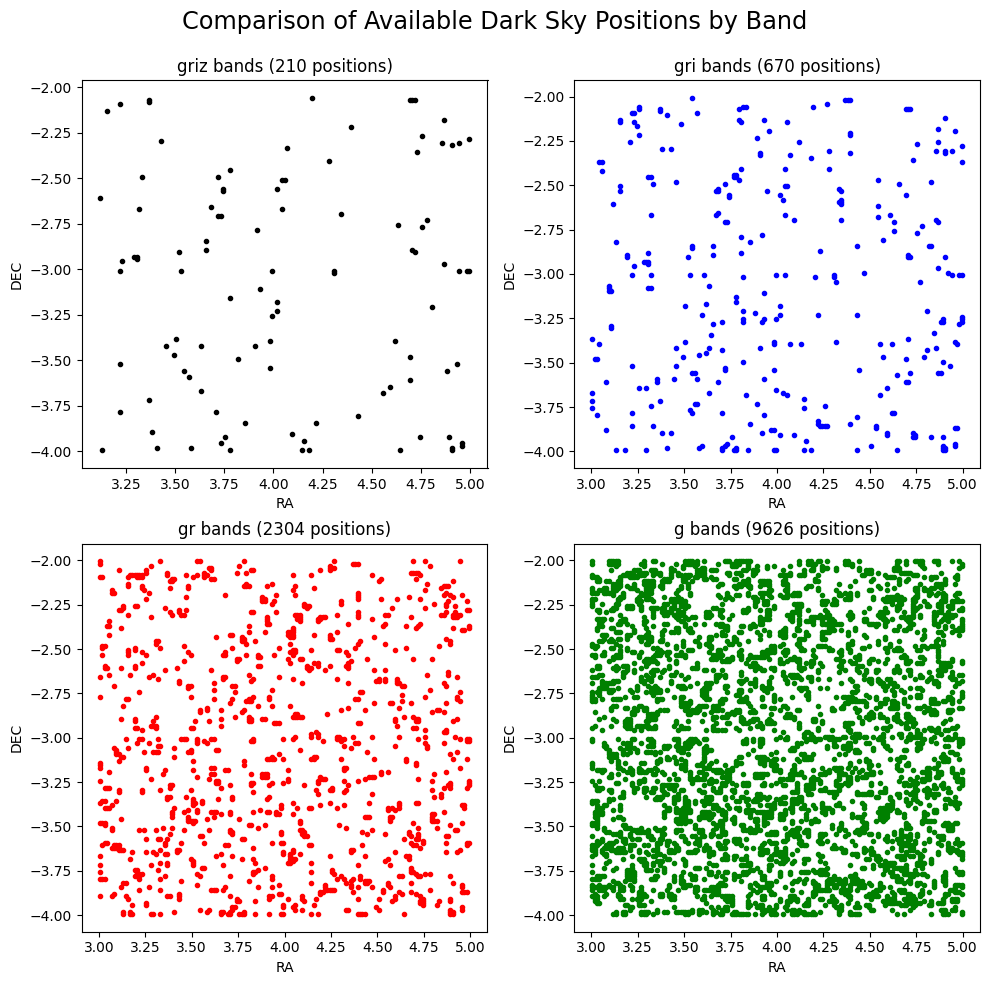

In [ ]:
# difference between griz and g band in the same area
print(f"Positions found (griz): {positions_allbands.size}")
print(f"Positions found (gri): {positions_gribands.size}")
print(f"Positions found (gr): {positions_grbands.size}")
print(f"Positions found (g): {positions_gband.size}")

fig, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0,0].plot(positions_allbands['ra'], positions_allbands['dec'], 'k.')
ax[0,0].set(title=f"griz bands ({positions_allbands.size} positions)", xlabel="RA", ylabel="DEC")

ax[0,1].plot(positions_gribands['ra'], positions_gribands['dec'], 'b.')
ax[0,1].set(title=f"gri bands ({positions_gribands.size} positions)", xlabel="RA", ylabel="DEC")

ax[1,0].plot(positions_grbands['ra'], positions_grbands['dec'], 'r.')
ax[1,0].set(title=f"gr bands ({positions_grbands.size} positions)", xlabel="RA", ylabel="DEC")

ax[1,1].plot(positions_gband['ra'], positions_gband['dec'], 'g.')
ax[1,1].set(title=f"g bands ({positions_gband.size} positions)", xlabel="RA", ylabel="DEC")

fig.tight_layout()
fig.suptitle("Comparison of Available Dark Sky Positions by Band", fontsize='xx-large')
fig.subplots_adjust(top=0.91)

plt.show()

In [8]:
# generate "whole sky"
# positions_allsky_gband = catalog_g_band.all_sky(query_dist=2.0)

# generate sections of the whole sky
positions_allsky_gband = catalog.all_sky(query_dist=2.0, min_ra=212, max_ra=216, min_dec=16, max_dec=20, bands=('g', 'r', 'i', 'z'))

================= WHOLE SKY =================
===== From 212,16 to 216,20 in 2.0^2 squares ======
====== WHOLE SKY: Looping through sky coordinates... =====
====== 2.0-degree square starting from RA,DEC = 212.0, 16.0 ======
> Creating sky catalog from one 2.0-degree square starting from (212.0, 16.0) to (214.0, 18.0)
>> Querying the tractor catalog for stars from RA/DEC(212.0, 16.0) to (214.0, 18.0)...
>> Looping through sky coordinates...
>>> Generating sky catalog for square RA,DEC (212.0, 16.0) to (213.0, 17.0)...
>>>> Combining mask and queried stars...
>>>> Calculating pixel values for stars....
>>>> Creating segmentation map...
Done!
>>>> Finding dark regions in segmentation map...
>>>> Converting dark regions to coordinates...
>>>> Finding maximum extent of stars beyond the degree-square bounds...
>>>> Done!
>>> Generating sky catalog for square RA,DEC (213.0, 16.0) to (214.0, 17.0)...
>>>> Combining mask and queried stars...
>>>> Calculating pixel values for stars....
>>>> Crea

: 

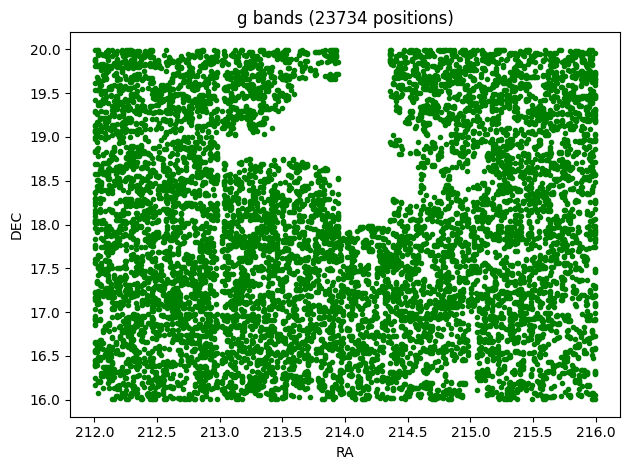

In [ ]:
fig, ax = plt.subplots()
ax.plot(positions_allsky_gband['ra'], positions_allsky_gband['dec'], 'g.')
ax.set(title=f"g bands ({positions_allsky_gband.size} positions)", xlabel="RA", ylabel="DEC")
plt.tight_layout()
plt.show()

Whole sky generation avoids the Galactic plane (within |b| > 18) and the LMC / SMC, and simply does not run the dark sky finding algorithms on the degree-level squares that intersect with those boundaries.